In [1]:
import numpy as np
from lmfit import Parameters, fit_report, minimize
import matplotlib.pyplot as plt
import pandas as pd
import uncertainties as un
from scipy.stats import chi2

plt.rcParams["font.size"] = 20
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "font.family": "roman-serif",
    "font.sans-serif": "Helvetica",
})
plt.rcParams.update({'pgf.preamble': r'\usepackage{amsmath}'})

In [2]:
# Pb = pd.read_csv("Pb.pl", sep = " ", index_col = None)
Pb = np.loadtxt("Pb.pl", skiprows = 1)
energy = Pb[:,0]
absortion = Pb[:,1]

### Plotting the data

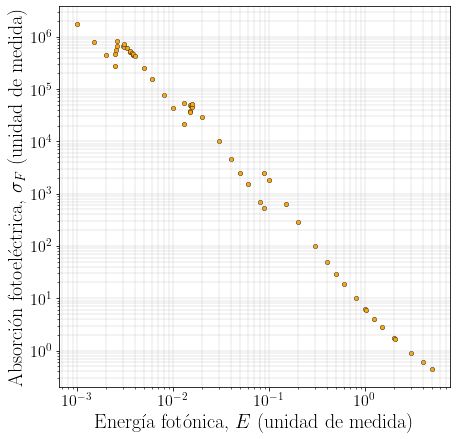

In [3]:
fig, ax = plt.subplots(figsize=(7,7))
scale = "log"
ax.scatter(energy, absortion, s = 20, color = "orange", linewidth = 0.4, edgecolor = "k")
ax.set_yscale(scale)
ax.set_xscale(scale)
ax.tick_params(axis = "both", which = "both", labelsize = 16)
ax.grid(True, which = "both", linewidth = 0.3)
ax.set_xlabel("Energía fotónica, $E$ (unidad de medida)")
ax.set_ylabel("Absorción fotoeléctrica, $\sigma_F$ (unidad de medida)")
plt.show()

### Plotting the initialization

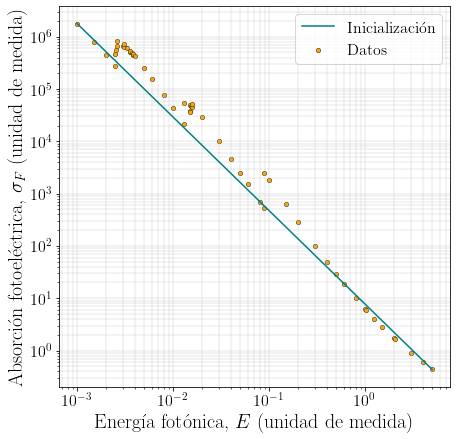

In [4]:
a0 = (np.log(absortion[0])-np.log(absortion[-1]))/(np.log(energy[-1])-np.log(energy[0]))
C0 = absortion[0]*energy[0]**a0
p0 = [C0, a0]
model = lambda E, a, C: C/(E**a)

xe = np.linspace(energy[0],energy[-1],1000)

fig, ax = plt.subplots(figsize=(7,7))
scale = "log"
ax.plot(xe, model(xe, a0, C0), color = "teal", label = "Inicialización")
ax.scatter(energy, absortion, s = 20, color = "orange", linewidth = 0.4, edgecolor = "k", label = "Datos")
ax.set_yscale(scale)
ax.set_xscale(scale)
ax.tick_params(axis = "both", which = "both", labelsize = 16)
ax.grid(True, which = "both", linewidth = 0.3)
ax.set_xlabel("Energía fotónica, $E$ (unidad de medida)")
ax.set_ylabel("Absorción fotoeléctrica, $\sigma_F$ (unidad de medida)")
ax.legend(fontsize = 16)
plt.show()

### Doing the fitting

In [5]:
def pow_res(pars, E, data, sig):
    values = pars.valuesdict()
    a = values["a"]
    C = values["C"]   
    model = C/E**a
    
    residual = model-data
    chi_sqr = np.divide(residual**2,sig**2)
    
    return chi_sqr

params = Parameters()
params.add("a", value = a0)
params.add("C", value = C0)

a =  1.09+/-0.05
C =  (8.7+/-2.9)e+02
χ² = 6.61838e+11


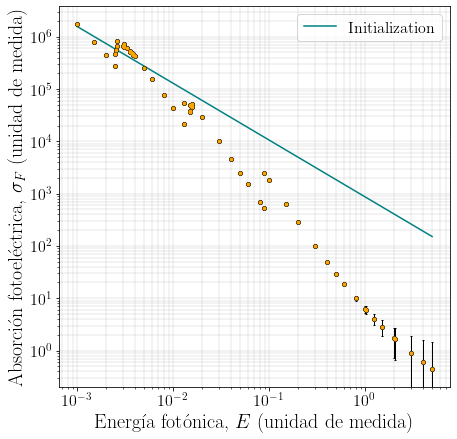

In [6]:
synth_sig = np.ones(np.shape(energy))

fit = minimize(pow_res, params, args = (energy,), kws = {"data": absortion, "sig": synth_sig})
a = un.ufloat(fit.params["a"].value, fit.params["a"].stderr)
C = un.ufloat(fit.params["C"].value, fit.params["C"].stderr)


chi_sqr = np.sum(np.divide((absortion - model(energy, a.nominal_value, C.nominal_value))**2, synth_sig**2))

print("a = " , a)
print("C = " , C)
print(f"χ² = {chi_sqr:0.5e}")

fig, ax = plt.subplots(figsize = (7,7))
ax.plot(xe, model(xe, a.nominal_value, C.nominal_value), color = "teal", label = "Initialization")
# Plot errorbars with the line color you want
ax.errorbar(energy,absortion,synth_sig, fmt='o',color='orange',capthick=0, elinewidth=0, capsize=0,zorder=10, markersize = 3, label = "")
# Plot black errorbars behind (lower zorder) with a wider line and cap thinkness
ax.errorbar(energy,absortion,synth_sig, fmt='o',color='k',capthick=1, elinewidth=1,capsize=1,zorder=5, markersize = 4)
ax.set_yscale(scale)
ax.set_xscale(scale)
ax.tick_params(axis = "both", which = "both", labelsize = 16)
ax.grid(True, which = "both", linewidth = 0.3)
ax.set_xlabel("Energía fotónica, $E$ (unidad de medida)")
ax.set_ylabel("Absorción fotoeléctrica, $\sigma_F$ (unidad de medida)")
ax.legend(fontsize = 16)
plt.show()
fit

a =  1.825+/-0.017
C =  8.4+/-0.7
χ² = 4.45271e+01


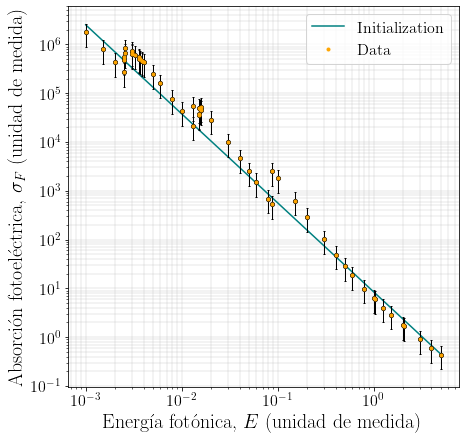

In [26]:
synth_sig = 0.5*absortion

fit = minimize(pow_res, params, args = (energy,), kws = {"data": absortion, "sig": synth_sig})
a = un.ufloat(fit.params["a"].value, fit.params["a"].stderr)
C = un.ufloat(fit.params["C"].value, fit.params["C"].stderr)


chi_sqr = np.sum(np.divide((absortion - model(energy, a.nominal_value, C.nominal_value))**2, synth_sig**2))

print("a = " , a)
print("C = " , C)
print(f"χ² = {chi_sqr:0.5e}")

fig, ax = plt.subplots(figsize = (7,7))
ax.plot(xe, model(xe, a.nominal_value, C.nominal_value), color = "teal", label = "Initialization")
# Plot errorbars with the line color you want
ax.errorbar(energy,absortion,synth_sig, fmt='o',color='orange',capthick=0, elinewidth=0, capsize=0,zorder=10, markersize = 3, label = "Data")
# Plot black errorbars behind (lower zorder) with a wider line and cap thinkness
ax.errorbar(energy,absortion,synth_sig, fmt='o',color='k',capthick=1, elinewidth=1,capsize=1,zorder=5, markersize = 4)
ax.set_yscale(scale)
ax.set_xscale(scale)
ax.tick_params(axis = "both", which = "both", labelsize = 16)
ax.grid(True, which = "both", linewidth = 0.3)
ax.set_xlabel("Energía fotónica, $E$ (unidad de medida)")
ax.set_ylabel("Absorción fotoeléctrica, $\sigma_F$ (unidad de medida)")
ax.legend(fontsize = 16)
plt.show()
fit

In [25]:

chi_array = np.array([52.92, 2.90E6, 42.87])

chi_test = chi2.sf(chi_array, len(energy))

for chi in chi_test:
    print(f"chi survival = {chi:0.14e}")

chi survival = 5.54506800354819e-01
chi survival = 0.00000000000000e+00
chi survival = 8.82910197494359e-01
